ADITYA KUMAR SINGH - 118A2101

1.Collection of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [3]:
adv_data=pd.read_csv('advertising.csv')
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,03-06-2016 03:36,0


In [4]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               997 non-null    float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      997 non-null    float64
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [5]:
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,997.000000,1000.000000,997.000000,1000.00000
mean,65.000200,36.009000,54983.928857,180.000100,0.481444,0.50000
std,15.853615,8.785562,13426.814504,43.902339,0.499906,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,46974.150000,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57009.760000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65461.920000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


2.Data analanalysis 

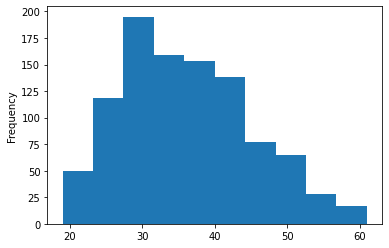

In [6]:
adv_data['Age'].plot.hist()

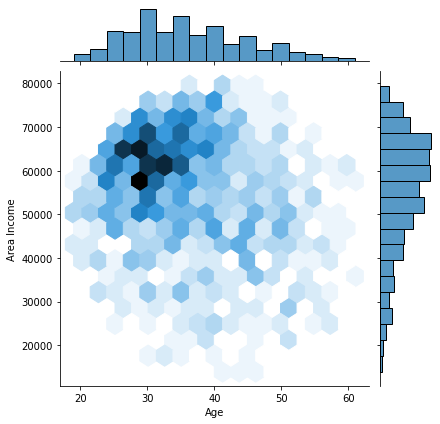

In [7]:
sns.jointplot(x = "Age", y = "Area Income", kind = "hex", data = adv_data)

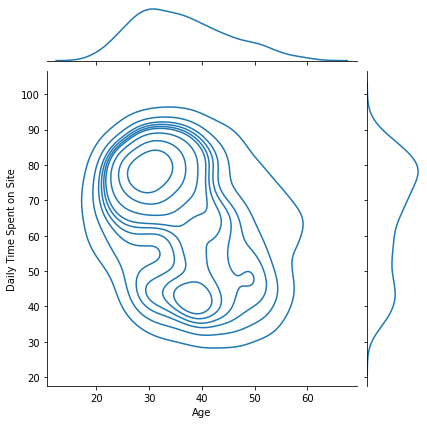

In [8]:
sns.jointplot(x = "Age", y = "Daily Time Spent on Site", kind = "kde", data = adv_data)

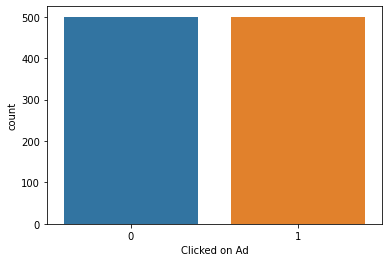

In [9]:
sns.countplot(x='Clicked on Ad', data=adv_data)

3.Data Cleaning

In [10]:
adv_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 3
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        3
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [11]:
adv_data['Area Income']=adv_data['Area Income'].fillna(adv_data['Area Income'].mean())
adv_data['Area Income']


0      61833.90
1      68441.85
2      59785.94
3      54806.18
4      73889.99
         ...   
995    71384.57
996    67782.17
997    42415.72
998    41920.79
999    29875.80
Name: Area Income, Length: 1000, dtype: float64

In [12]:
adv_data['Male']=adv_data['Male'].fillna(adv_data['Male'].mode()[0])
adv_data['Male']

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    0.0
999    0.0
Name: Male, Length: 1000, dtype: float64

In [13]:
adv_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [14]:
adv_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,24-03-2016 02:35,0


In [15]:
adv_data.drop(['Ad Topic Line','City','Country','Timestamp'], axis =1, inplace=True)
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0.0,0
1,80.23,31,68441.85,193.77,1.0,0
2,69.47,26,59785.94,236.50,0.0,0
3,74.15,29,54806.18,245.89,1.0,0
4,68.37,35,73889.99,225.58,0.0,0


4. Train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=adv_data.drop('Clicked on Ad', axis=1)
y=adv_data['Clicked on Ad']
print(y)
print(x)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64
     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09   0.0
1                       80.23   31     68441.85                193.77   1.0
2                       69.47   26     59785.94                236.50   0.0
3                       74.15   29     54806.18                245.89   1.0
4                       68.37   35     73889.99                225.58   0.0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58   1.0
996                     51.30   45     67782.17                134.42   1.0
997                     51.63   51     42415.72                120.37   1.0
998                     55.55   19     41920.79                187.95   0.0
999              

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 5)
(300, 5)
(700,)
(300,)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = logmodel.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, predictions)

array([[138,   8],
       [ 28, 126]])

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       146
           1       0.94      0.82      0.88       154

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)*100

88.0